In [2]:
%matplotlib inline
import seaborn
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 6)

In [3]:
import librosa, IPython.display as ipd
import scipy, theano as th, time, keras
from scipy.special import expit

[&larr; Back to Index](index.html)

# Neural Networks

Neural networks are a category of machine learning models which have seen a resurgence since 2006. So-called *deep learning* is the recent area of machine learning which combines many neuron layers (e.g. 20, 50, or more) to form a "deep" neural network. In doing so, a deep neural network can accomplish sophisticated classification tasks that classical machine learning models would find difficult.

## Keras

Keras is a Python package for deep learning which provides an easy-to-use layer of abstraction on top of Theano and Tensorflow.

Import Keras objects:

In [4]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, AutoEncoder
from keras.layers import containers
from keras.layers.noise import GaussianNoise
import keras.optimizers

Create a neural network architecture by layering neurons. Define the number of neurons in each layer and their activation functions:

In [23]:
model = Sequential()
model.add(Dense(input_dim=2, output_dim=4, activation='relu'))
model.add(Dense(output_dim=4, activation='relu'))
model.add(Dense(output_dim=2, activation='softmax'))

Choose the optimizer, i.e. the update rule that the neural network will use to train:

In [24]:
optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True, decay=1e-3)

Compile the model, i.e. create the low-level code that the CPU or GPU will actually use for its calculations during training and testing:

In [25]:
model.compile(loss='binary_crossentropy', optimizer=optimizer)

## Example: XOR

The operation XOR is defined as:

$$ XOR(x, y) = \left{ 1 if x \right. $$

Synthesize training data for the XOR problem.

In [10]:
X_train = scipy.randn(1000, 2)
print X_train.shape

(1000, 2)


In [15]:
print X_train[:5]

[[-0.09263061 -0.36175166]
 [ 1.0852675  -0.25564605]
 [-0.56490495  0.47668881]
 [-0.03774602 -0.98621299]
 [-1.54151787  0.54774175]]


Create ground truth labels for the training data.

In [11]:
y_train = scipy.array([
    [float(x[0]*x[1] > 0), float(x[0]*x[1] <= 0)]
    for x in X_train
])
print y_train.shape

(1000, 2)


In [13]:
y_train[:5]

array([[ 1.,  0.],
       [ 0.,  1.],
       [ 0.,  1.],
       [ 1.,  0.],
       [ 0.,  1.]])

Plot the training data:

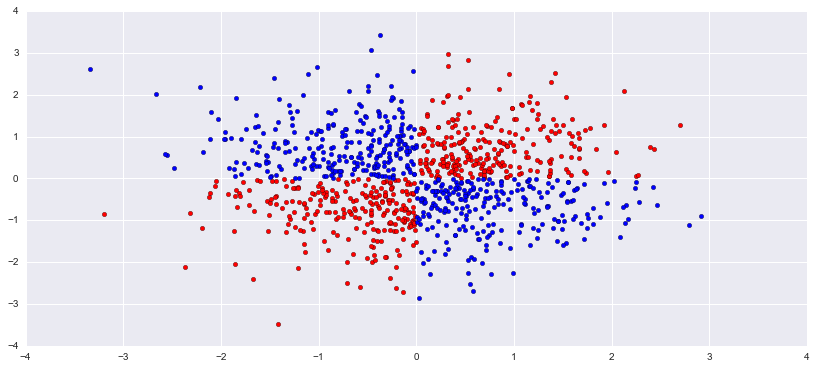

In [16]:
plt.scatter(X_train[y_train[:,0]>0.5,0], X_train[y_train[:,0]>0.5,1], c='r')
plt.scatter(X_train[y_train[:,1]>0.5,0], X_train[y_train[:,1]>0.5,1], c='b')

Finally, train the model!

In [26]:
results = model.fit(X_train, y_train, nb_epoch=50, batch_size=10)

Epoch 1/50
1000/1000 [==============================] - 0s - loss: 0.5816     
Epoch 2/50
1000/1000 [==============================] - 0s - loss: 0.3198     
Epoch 3/50
1000/1000 [==============================] - 0s - loss: 0.2197     
Epoch 4/50
1000/1000 [==============================] - 0s - loss: 0.1773     
Epoch 5/50
1000/1000 [==============================] - 0s - loss: 0.1547     
Epoch 6/50
1000/1000 [==============================] - 0s - loss: 0.1361     
Epoch 7/50
1000/1000 [==============================] - 0s - loss: 0.1273     
Epoch 8/50
1000/1000 [==============================] - 0s - loss: 0.1163     
Epoch 9/50
1000/1000 [==============================] - 0s - loss: 0.1057     
Epoch 10/50
1000/1000 [==============================] - 0s - loss: 0.1064     
Epoch 11/50
1000/1000 [==============================] - 0s - loss: 0.1046     
Epoch 12/50
1000/1000 [==============================] - 0s - loss: 0.0963     
Epoch 13/50
1000/1000 [==========================

Plot the loss function as a function of the training iteration number:

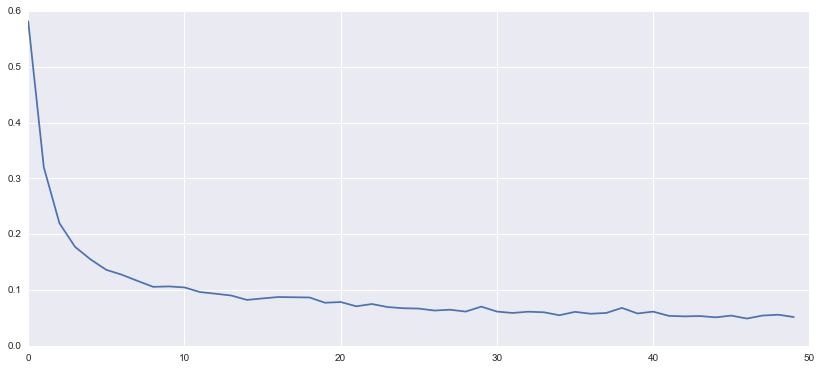

In [27]:
plt.plot(results.history['loss'])

Create test data:

In [30]:
X_test = scipy.randn(1000, 2)

Use the trained neural network to make predictions from the test data:

In [31]:
y_test = model.predict(X_test)

In [32]:
y_test.shape

(1000, 2)

Let's see if it worked:

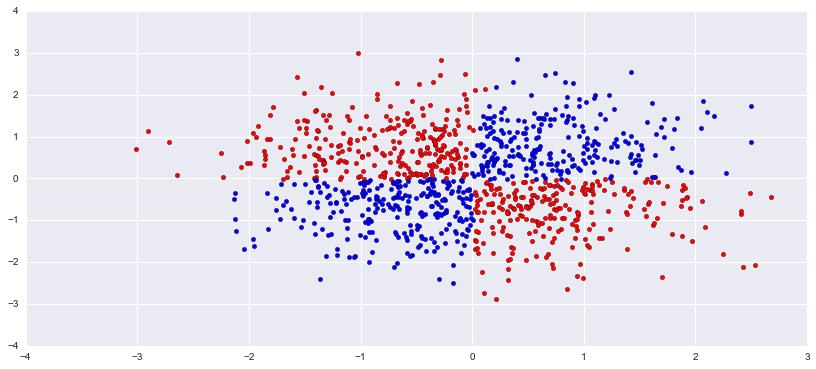

In [34]:
plt.scatter(X_test[y_test[:, 0] < 0.5,0], X_test[y_test[:, 0] < 0.5,1], c='r')
plt.scatter(X_test[y_test[:, 0] > 0.5,0], X_test[y_test[:, 0] > 0.5,1], c='b')

## Keras Autoencoder

In [20]:
from keras.regularizers import l1, l2, ActivityRegularizer

In [21]:
model = Sequential()
model.add(AutoEncoder(
        encoder=containers.Sequential([
                #Dense(1025, 1000, activation='relu', activity_regularizer=ActivityRegularizer(l1=0.1)), 
                Dense(1025, 1000, activation='relu'), 
                #Dropout(0.7),
                Dense(1000, 30, activation='relu')
            ]),
        decoder=containers.Sequential([
                Dense(30, 1000, activation='relu'), 
                #Dropout(0.7),
                Dense(1000, 1025, activation='relu')
            ]),
        output_reconstruction=False))

In [22]:
optimizer = keras.optimizers.SGD(lr=1.7)
model.compile(loss='mae', optimizer=optimizer)

In [23]:
x, fs = librosa.load('../tmp/bach.wav', duration=10, offset=5, sr=44100)

In [24]:
IPython.display.Audio(x, rate=fs)

In [25]:
n_fft = 2048
hop_length = 512
S = librosa.stft(x, n_fft=n_fft, hop_length=hop_length)
X = numpy.absolute(S).T
X.shape

(862, 1025)

In [ ]:
results = model.fit(X, X, nb_epoch=1000, batch_size=10)

In [ ]:
plt.plot(results.history['loss'])

In [ ]:
y = model.predict(X)

In [ ]:
y.shape

In [ ]:
librosa.display.specshow(y.T)

## Layer


In [ ]:
class Layer(object):
    
    x = th.tensor.dvector('x')
    W = th.tensor.dmatrix('W')
    b = th.tensor.dvector('b')
    z = th.tensor.dot(W, x) + b
    a = th.tensor.nnet.sigmoid(z)
    sigmoid = th.function([x, W, b], a)
    
    def __init__(self, neurons_in, neurons_out):
        self.neurons_in = neurons_in
        self.neurons_out = neurons_out
        self.W = 0.1*scipy.randn(neurons_out, neurons_in)
        self.b = 0.1*scipy.randn(neurons_out)
        self.d_W = scipy.zeros_like(self.W)
        self.d_b = scipy.zeros_like(self.b)
    
    def forward(self, x):
        return self.sigmoid(x, self.W, self.b)
    
    def backward(self, y):
        return sigmoid(self.W.T.dot(y))
    
    def contrastive_divergence(self, x):
        h = self.forward(x)
        

In [ ]:
th.pp(Layer.a)

In [ ]:
layer0 = Layer(3, 2)
layer0.W = scipy.randn(2, 3)
layer0.b = scipy.randn(2)
X = scipy.rand(10, 3)
y = [layer0.forward(x) for x in X]

In [ ]:
print X
print y
print layer0.forward(X[0])
print layer0.W

In [ ]:
x = [1, 0, 1]
y = [1, 1]
W0 = scipy.array([[]])
a = layer.forward(x)
print a
print scipy.inner(y-a, y-a)

In [ ]:
layer = Layer(3, 2)

In [ ]:
delta = -(y - a)*a*(1 - a)
print delta

In [ ]:
alpha = 10
max_iter = 1000
r = scipy.zeros(max_iter)
iters = range(max_iter)
for iter in iters:
    d_W = scipy.outer(delta, x)
    d_b = delta
    layer.W -= alpha*d_W
    layer.b -= alpha*d_b
    a = layer.forward(x)
    delta = -(y - a)*a*(1 - a)
    r[iter] = scipy.linalg.norm(y-a)
plt.semilogy(iters, r)

## Feedforward

In [ ]:
class Feedforward(object):
    
    def __init__(self, n_neurons):
        self.num_layers = len(n_neurons)
        self.layers = [
            Layer(n_neurons[i], n_neurons[i+1]) 
            for i in range(self.num_layers - 1)
        ]

    def forward(self, x, start_layer=None, end_layer=None):
        A = [x]
        a = x
        for layer in self.layers[start_layer:end_layer]:
            a = layer.forward(a)
            A.append(a)
        return A

    def train(self, X, y, alpha=1, max_iter=10):
        for iter in range(max_iter):
            self.train_step(X, y, alpha)

    def train_step(self, X, y, alpha=1):
        for x in X:
            A = self.forward(x)
            delta = y - a
            for layer, a in zip(self.layers[::-1], A[::-1]):
                layer.W += alpha*delta*a
                layer.b -= alpha*delta
                delta = scipy.dot(layer.W.T, delta)
                    
    def encode_decode(self, x):
        return self.forward(x)[-1]
    
    def encode(self, x):
        return self.forward(x, end_layer=self.num_layers/2)[-1]
    
    def decode(self, y):
        return self.forward(y, start_layer=self.num_layers/2)[-1]

## XOR

In [ ]:
X = [[0, 1], [1, 0], [0, 0], [1, 1]]
y = [1, 1, 0, 0]

In [ ]:
model = Feedforward([2, 1])
model.train(X, y)

## Simple Autoencoder

In [ ]:
class SimpleAutoencoder(object):
    
    def __init__(self, n_neurons):
        self.layer_0 = Layer(n_neurons[0], n_neurons[1])
        self.layer_1 = Layer(n_neurons[1], n_neurons[0])

    def forward(self, x):
        a1 = self.layer_0.forward(x)
        a2 = self.layer_1.forward(a1)
        return [x, a1, a2]

    def train(self, X, alpha=1, lamb=0, max_iter=10):
        for iter in range(max_iter):
            self.train_step(X, alpha, lamb)

    def train_step(self, X, alpha=1, lamb=0):
        m = len(X)
        for x in X:
            A = self.forward(x)
            delta = -(x - A[2])*A[2]*(1 - A[2])
            
            self.layer_1.d_W += scipy.outer(delta, A[1])
            self.layer_1.d_b += delta
            self.layer_1.W -= alpha*((1/m)*self.layer_1.d_W + lamb*self.layer_1.W)
            self.layer_1.b -= (alpha/m)*self.layer_1.d_b
            delta = scipy.dot(self.layer_1.W.T, delta)*A[1]*(1 - A[1])

            self.layer_0.d_W += scipy.outer(delta, A[0])
            self.layer_0.d_b += delta
            self.layer_0.W -= alpha*((1/m)*self.layer_0.d_W + lamb*self.layer_0.W)
            self.layer_0.b -= (alpha/m)*self.layer_0.d_b
            
    def encode_decode(self, x):
        return self.forward(x)[-1]
    
    def encode(self, x):
        return self.layer_0.forward(x)
    
    def decode(self, y):
        return self.layer_1.forward(y)

In [ ]:
Z = scipy.random.randint(0, 2, (100, 3))
print Z

In [ ]:
X = Z.dot(0.3*scipy.rand(3, 5))
print X.shape
print X

In [ ]:
sae = SimpleAutoencoder([5, 3])
sae.train(X, alpha=0.1, lamb=0.01, max_iter=20)

In [ ]:
sae.layer_0.W

In [ ]:
sae.layer_0.b

In [ ]:
x = scipy.rand(5)
print x

In [ ]:
sae.encode(x)

In [ ]:
sae.train_step(X, alpha=0.001, lamb=0.0)
y = sae.encode_decode(x)
print y
print scipy.inner(y-x, y-x)

## Stacked Autoencoder

In [ ]:
class Autoencoder(object):
    
    def __init__(self, n_neurons):
        n_neurons = n_neurons + n_neurons[-2::-1]
        self.num_layers = len(n_neurons)
        self.layers = [
            Layer(n_neurons[i], n_neurons[i+1]) 
            for i in range(self.num_layers - 1)
        ]

    def forward(self, x, start_layer=None, end_layer=None):
        A = [x]
        a = x
        for layer in self.layers[start_layer:end_layer]:
            a, z = layer.forward(a)
            A.append(a)
        return A

    def train(self, X, alpha=1, max_iter=10):
        for iter in range(max_iter):
            self.train_step(X, alpha)

    def train_step(self, X, alpha=1):
        c = alpha/len(X)
        for x in X:
            A = self.forward(x)
            delta = -(x - A[-1])*A[-1]*(1 - A[-1])
            for layer, a in zip(self.layers[::-1], A[-2::-1]):
                layer.d_W += scipy.outer(delta, a)
                layer.d_b += delta
                layer.W -= c*layer.d_W
                layer.b -= c*layer.d_b
                delta = scipy.dot(layer.W.T, delta)*a*(1-a)
                    
    def encode_decode(self, x):
        return self.forward(x)[-1]
    
    def encode(self, x):
        return self.forward(x, end_layer=self.num_layers/2)[-1]
    
    def decode(self, y):
        return self.forward(y, start_layer=self.num_layers/2)[-1]

In [ ]:
AE = Autoencoder([10, 5, 3])

In [ ]:
X = scipy.rand(100, 10)
AE.train(X)

In [ ]:
x = scipy.rand(10)
print x

In [ ]:
y = AE.encode(x)
print y

In [ ]:
print AE.decode(y)

In [ ]:
print AE.encode_decode(x)

In [ ]:
AE.train_step(X)
print AE.encode(x)

[&larr; Back to Index](index.html)